<a href="https://colab.research.google.com/github/dsogden/NLP-Specialization/blob/main/Chap1_W3_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import math
import random

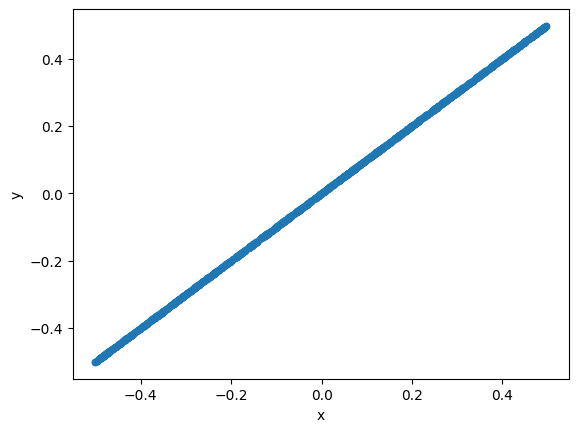

In [3]:
np.random.seed(1)
n = 1
x = np.random.uniform(low=1, high=2, size=1000)
y = x.copy()

x -= np.mean(x)
y -= np.mean(y)

data = pd.DataFrame({'x': x, 'y': y})
data.plot(kind='scatter', x='x', y='y')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


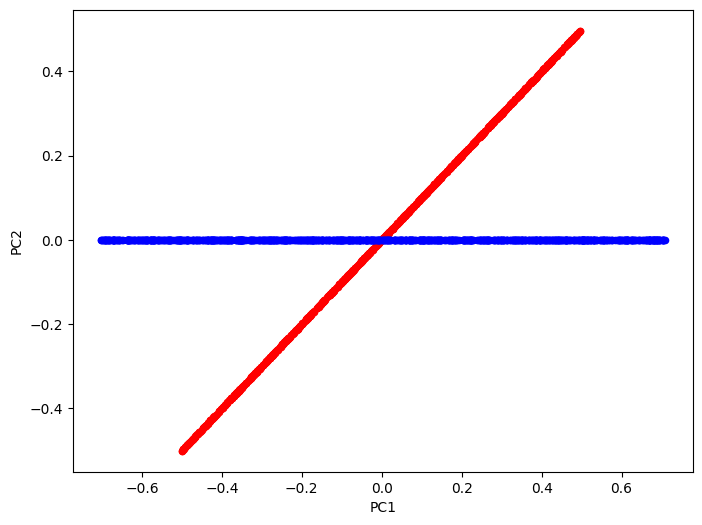

In [7]:
pca = PCA(n_components=2)
pcaTr = pca.fit(data)
rotated_data = pcaTr.transform(data)
data_pca = pd.DataFrame(data=rotated_data, columns=['PC1', 'PC2'])
fig, ax = plt.subplots(figsize=(8, 6))
data.plot(kind='scatter', x='x', y='y', c='r', ax=ax)
data_pca.plot(kind='scatter', x='PC1', y='PC2', c='b', ax=ax)
plt.show()

## Understanding the transformation model pcaTr

In [8]:
pcaTr.components_

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [10]:
print(f'Eigenvalues: {pcaTr.explained_variance_}')

Eigenvalues: [1.66465230e-01 4.66893811e-33]


In [12]:
np.cos(45 * (np.pi / 180))

0.7071067811865476

## Correlated normal random variables

In [14]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

In [19]:
np.random.seed(100)
std1 = 1
std2 = 0.333

x = np.random.normal(loc=0, scale=std1, size=1000)
y = np.random.normal(loc=0, scale=std2, size=1000)

x -= np.mean(x)
y -= np.mean(y)

n = 1
angle = np.arctan(1 / n)
print(f'angle: {angle * (180 / np.pi)}')

rotation_matrix = np.array([
    [np.cos(angle), np.sin(angle)],
    [-np.sin(angle), np.cos(angle)]
])

print(f'Rotation matrix: {rotation_matrix}')

angle: 45.0
Rotation matrix: [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


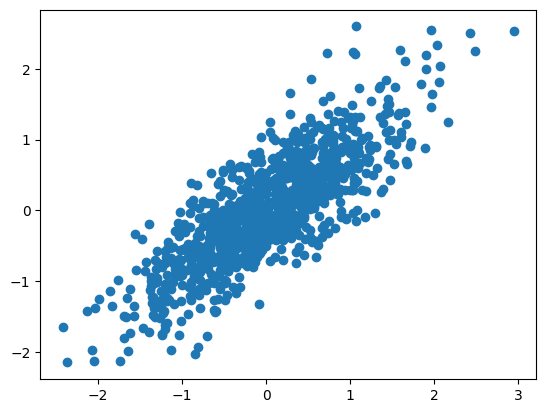

In [34]:
xy = np.concatenate([x.reshape(-1, 1), y.reshape(-1, 1)], axis=1)
data = np.dot(xy, rotation_matrix)
plt.scatter(data[:, 0], data[:, 1])
plt.show()

Eigenvectors: [[ 0.70827652  0.7059351 ]
 [-0.7059351   0.70827652]]
Eigenvalues: [1.09488457 0.11243237]


<ipython-input-37-7a149d27cd0d>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, rotation_matrix[0][0] * std1 * 3], [0, rotation_matrix[0][1] * std1 * 3], 'k-', color='red')
<ipython-input-37-7a149d27cd0d>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, rotation_matrix[1][0] * std2 * 3], [0, rotation_matrix[1][1] * std2 * 3], 'k-', color='green')


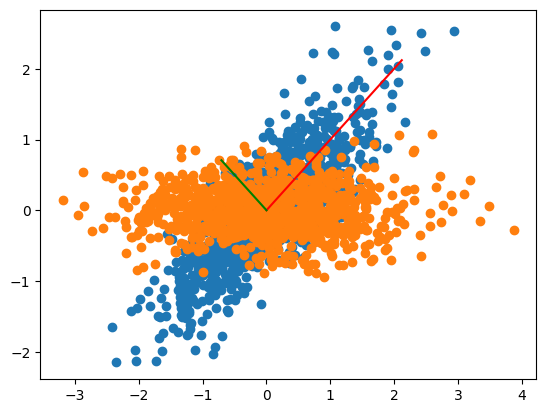

In [37]:
plt.scatter(data[:, 0], data[:, 1])
pca_tr = pca.fit(data)
data_pca = pca_tr.transform(data)
print(f'Eigenvectors: {pca_tr.components_}')
print(f'Eigenvalues: {pca_tr.explained_variance_}')

plt.scatter(data_pca[:, 0], data_pca[:, 1])

# Plot the first component axe. Use the explained variance to scale the vector
plt.plot([0, rotation_matrix[0][0] * std1 * 3], [0, rotation_matrix[0][1] * std1 * 3], 'k-', color='red')
# Plot the second component axe. Use the explained variance to scale the vector
plt.plot([0, rotation_matrix[1][0] * std2 * 3], [0, rotation_matrix[1][1] * std2 * 3], 'k-', color='green')

plt.show()